<a href="https://www.kaggle.com/code/nicolasdefebrer/spaceshiptitanic?scriptVersionId=187728556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Anàlisi de les dades: Spaceship Titanic

# 1. Preparació de l'entorn

In [290]:
# Importació de mòduls

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import re as re

%matplotlib inline

In [291]:
# Càrrega de dades

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
dades = [train, test]

In [292]:
# Informació dels atributs

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [293]:
# Descripció estadística dels atributs numèrics

train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [294]:
# Valors nuls

train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [295]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [296]:
for df in dades:    
    df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
    df['Age'].fillna(df['Age'].median(), inplace = True)
    df['CryoSleep'].fillna(df['CryoSleep'].mode()[0],inplace = True)
    df['Destination'].fillna(df['Destination'].mode()[0],inplace = True)
    df['VIP'].fillna(df['VIP'].mode()[0],inplace = True)
    df['RoomService'].fillna(df['RoomService'].median(), inplace = True)
    df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace = True)
    df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace = True)
    df['Spa'].fillna(df['Spa'].median(), inplace = True)
    df['VRDeck'].fillna(df['VRDeck'].median(), inplace = True)

/tmp/ipykernel_33/1268571004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HomePlanet'].fillna(df['HomePlanet'].mode()[0],inplace = True)
/tmp/ipykernel_33/1268571004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [297]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [298]:
test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

# 2. Exploració i transformació de les dades

# PassengerID

In [299]:
# Eliminem l'atribut PassengerId

train.drop(['PassengerId'], axis=1, inplace=True)

# Transported

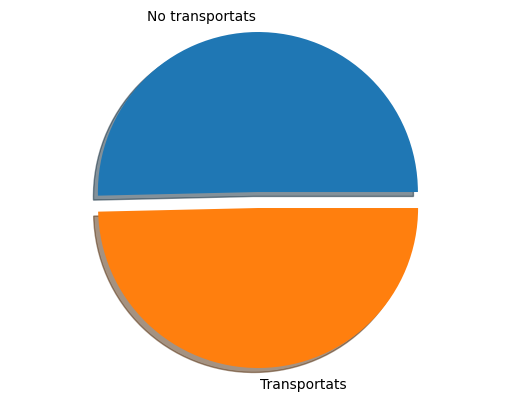

In [300]:
# Percentatge de transportats

transported = [train.loc[train.Transported==1, 'Transported'].count(),train.loc[train.Transported==0, 'Transported'].count()]
fig1, ax1 = plt.subplots()
plt.pie(transported, shadow = True, labels = ["No transportats","Transportats"], explode = (0.1,0))
ax1.axis('equal')
plt.show()

# HomePlanet

In [ ]:
# Transportats per planeta natal

train[['HomePlanet', 'Transported']].groupby(['HomePlanet']).mean().T

HomePlanet,Earth,Europa,Mars
Transported,0.427649,0.658846,0.523024


HomePlanet,Earth,Europa,Mars
Transported,0.427649,0.658846,0.523024


In [ ]:
sns.barplot(x="HomePlanet", y="Transported", data=train)

In [ ]:
# Convertim els planetes en números

for df in dades:
    df.loc[df.HomePlanet=='Europa','HomePlanet'] = 1
    df.loc[df.HomePlanet=='Earth','HomePlanet'] = 2
    df.loc[df.HomePlanet=='Mars','HomePlanet'] = 3
    
sns.barplot(x="HomePlanet", y="Transported", data = train)

# Cryosleep

In [ ]:
# Transportats segons si estaven en "CryoSleep"

train[["CryoSleep", "Transported"]].groupby(['CryoSleep']).mean().T

In [ ]:
sns.barplot(x="CryoSleep",y="Transported", data = train)

# Cabin

In [ ]:
# Transportats segons la ubicació de la cabina

for df in dades:
    df['Cabin'].fillna('Z/9999/Z', inplace=True)

In [ ]:
# Dividim l'atribut "Cabin" en els atributs "deck", "num" i "side" i omplim les dades que falten

for df in dades:
    df['deck'] = df['Cabin'].apply(lambda x:str(x)[:1])
    df['num'] = df['Cabin'].apply(lambda x:x.split('/')[1])
    df['num'] = df['num'].astype(int)
    df['side'] = df['Cabin'].apply(lambda x:str(x)[-1:])
    df['deck'].fillna(df['deck'].mode()[0],inplace=True)
    df['num'].fillna(df['num'].mode()[0],inplace=True)
    df['side'].fillna(df['side'].mode()[0],inplace=True)

In [ ]:
# Transportats per cada "deck"

train[['deck','Transported']].groupby(['deck'],as_index=False).mean().sort_values(by='Transported',ascending=False)

In [ ]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train, x='deck', hue='Transported', order=['A','B','C','D','E','F','G','T','Z'])
plt.title('Cabin deck')

In [ ]:
deck_mapping = {"A": 1, "B": 2, "C": 3,"D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "Z": 9}
for df in dades:
    df['deck'] = df['deck'].map(deck_mapping)

train.head()

In [ ]:
side_map = {'P':1,'S':0}
for df in dades:
    df['side'] = df['side'].map(side_map)

In [ ]:
for df in dades:
    df['side'].fillna(df['side'].mode()[0],inplace=True)

In [ ]:
train.isnull().sum()

# Destination

In [ ]:
# Transportats segons la destinació

train[["Destination", "Transported"]].groupby(['Destination']).mean().T

In [ ]:
sns.barplot(x="Destination",y="Transported", data = train)

# VIP

In [ ]:
# Transportats segons si son VIP

train[["VIP", "Transported"]].groupby(['VIP']).mean().T

In [ ]:
sns.barplot(x="VIP",y="Transported", data = train)

# Age

In [ ]:
# Distribució d'edats

sns.distplot(train.loc[train.Age.notnull(),'Age'], fit = norm)

In [ ]:
# Categorització en grups d'edat

for df in dades:
    df["Age"] = df["Age"].fillna(-0.5)
    bins = [-1,0, 5, 10, 15, 30, 60, np.inf]
    df['AgeGroup'] = pd.cut(df["Age"], bins, labels = range(7))
    df.drop(['Age'], axis=1, inplace=True)

In [ ]:
sns.barplot(x="AgeGroup", y="Transported", data = train)

# RoomService

In [ ]:
# Distribució dels valors de l'atribut RoomService

sns.distplot(train['RoomService'], fit = norm)

In [ ]:
# Transformació logarítmica de les dades

for df in dades:
    df['RoomService'].fillna(df['RoomService'].mean(), inplace = True)
    df['RoomService'] = np.log1p(df['RoomService'])

sns.distplot(train['RoomService'], fit = norm)

# Foodcourt

In [ ]:
# Distribució dels valors de l'atribut FoodCourt

sns.distplot(train['FoodCourt'])

In [ ]:
# Transformació logarítmica de les dades

for df in dades:
    df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace = True)
    df['FoodCourt'] = np.log1p(df['FoodCourt'])

sns.distplot(train['FoodCourt'], fit = norm)

# Shopping Mall

# Spa

# VRDeck

# Tarifa total

In [ ]:
# Creació de l'atribut Fare

df['Fare'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
train['Fare'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [ ]:
# Distribució dels valors de l'atribut Fare

sns.distplot(train['Fare'], fit = norm)

In [ ]:
# Transformació logarítmica de les dades

for df in dades:
    df['Fare'].fillna(df['Fare'].mean(), inplace = True)
    df['Fare'] = np.log1p(df['Fare'])

sns.distplot(train['Fare'], fit = norm)

In [ ]:
# Creació de categories

for df in dades:
    df['FareGroup'] = pd.qcut(df['Fare'], 6, labels=range(6))
    df['FareGroup'] = df['FareGroup'].astype('int')
    df.loc[df.FareGroup<1,'FareGroup'] = 1
    df.loc[(df.FareGroup>1) & (df.FareGroup<4),'FareGroup'] = 2
    df.loc[(df.FareGroup>4) & (df.FareGroup<8),'FareGroup'] = 3
    df.loc[df.FareGroup>8,'FareGroup'] = 4

sns.barplot(x="FareGroup", y="Transported", data=train)

# Correlació

In [ ]:
# Anàlisi de correlacions

correlation_matrix = train.corr()
correlation_matrix

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix);